In [2]:
import numpy as np 
import xarray as xr
import pandas as pd 
import os.path
import matplotlib.pyplot as plt 


In [59]:
dirn = '~/ERA5/script/Stability-Explanability/7maps_36yrtraining_RMMERA5_filtered_trop/output/'
iniRMM = xr.open_dataset('/global/homes/l/linyaoly/ERA5/reanalysis/RMM_ERA5_daily.nc')
a = iniRMM.sel(time=slice('2015-01-01','2016-12-30'))
b = iniRMM.sel(time=slice('2017-01-01','2019-12-31'))

iniRMM = xr.concat((a,b), dim='time')
BCC = np.zeros((30,5))
del a 

for lead in np.arange(1,31):
    for yn in np.arange(2015,2020):
        fnp = dirn + 'predicted_UNET_7mapstrop_RMMERA5_36yr_lead' + str(lead) + '_dailyinput_mem1d' + str(yn) + '.csv'
        fnt = dirn + 'truth_UNET_7mapstrop_RMMERA5_36yr_lead' + str(lead) + '_dailyinput_mem1d' + str(yn) + '.csv'

        dsp = pd.read_csv(fnp, header=None, names=['RMMp1','RMMp2'])
        dst = pd.read_csv(fnt, header=None, names=['RMMt1','RMMt2'])

        a = iniRMM.sel(time=slice(str(yn)+'-01-01',str(yn)+'-12-31'))
        RMM1 = a['RMM'][:,0]
        RMM2 = a['RMM'][:,1]
        IniAmp = np.sqrt(RMM1 * RMM1 + RMM2 * RMM2)

        ds = pd.concat((dsp,dst), axis=1)
        ds['IniAmp'] = IniAmp.values 
        ds = ds.iloc[274:,:]

        ds = ds.loc[ds['IniAmp']>=1]

        r1p = np.asarray(ds['RMMp1'])
        r2p = np.asarray(ds['RMMp2'])
        r1t = np.asarray(ds['RMMt1'])
        r2t = np.asarray(ds['RMMt2'])

        A = np.sum(r1p * r1t + r2p * r2t)
        B = np.sqrt(np.sum(r1p * r1p + r2p * r2p))
        C = np.sqrt(np.sum(r1t * r1t + r2t * r2t))
        BCC[lead-1,yn-2015] = A / B / C 
        del a 


Text(0, 0.5, 'BCC')

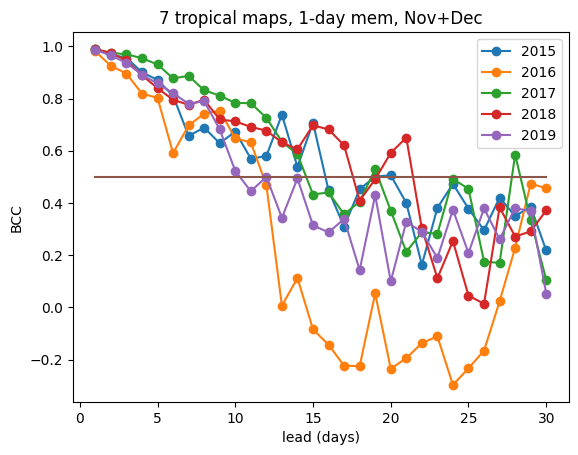

In [60]:
import matplotlib.pyplot as plt 

plt.plot(np.arange(1,31), BCC, 'o-', label=['2015','2016','2017','2018','2019'])
plt.plot(np.arange(1,31), 0.5 * np.ones(30))
plt.legend()
plt.title('7 tropical maps, 1-day mem, Nov+Dec')
plt.xlabel('lead (days)')
plt.ylabel('BCC')

Text(0, 0.5, 'BCC')

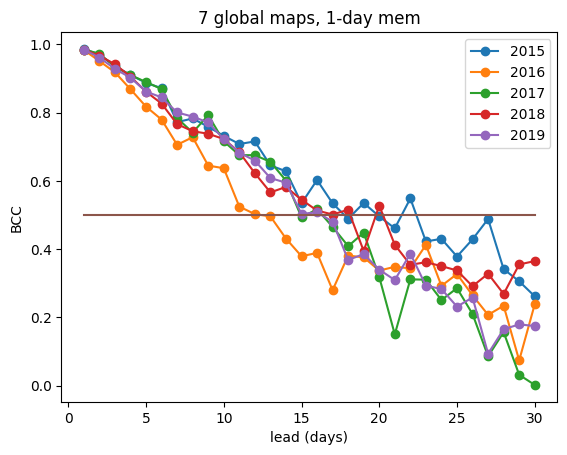

In [47]:
import matplotlib.pyplot as plt 

plt.plot(np.arange(1,31), BCC, 'o-', label=['2015','2016','2017','2018','2019'])
plt.plot(np.arange(1,31), 0.5 * np.ones(30))
plt.legend()
plt.title('7 global maps, 1-day mem')
plt.xlabel('lead (days)')
plt.ylabel('BCC')

Text(0, 0.5, 'BCC')

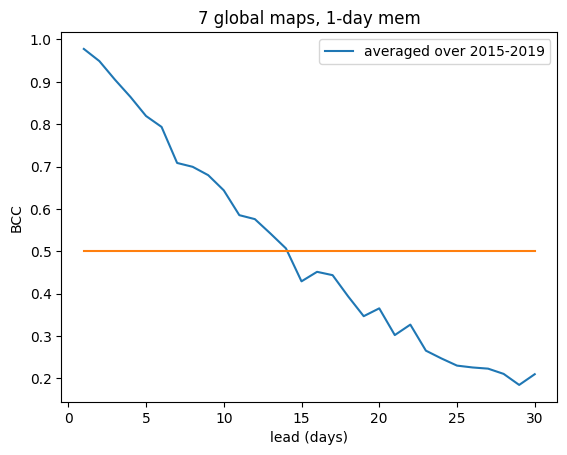

In [7]:
dirn = '~/ERA5/script/Stability-Explanability/7maps_36yrtraining_RMMERA5_filtered/output/'

BCC = np.zeros(30)

for lead in np.arange(1,31):
    dsp0 = []
    dst0 = []
    for yn in np.arange(2015,2020):
        fnp = dirn + 'predicted_UNET_7maps_RMMERA5_36yr_lead' + str(lead) + '_dailyinput_mem1d' + str(yn) + '.csv'
        fnt = dirn + 'truth_UNET_7maps_RMMERA5_36yr_lead' + str(lead) + '_dailyinput_mem1d' + str(yn) + '.csv'

        dsp = pd.read_csv(fnp, header=None, names=['RMM1','RMM2'])
        dsp0.append(dsp)
        dst = pd.read_csv(fnt, header=None, names=['RMM1','RMM2'])
        dst0.append(dst)

    dsp = pd.concat(dsp0, axis=0, ignore_index=True)
    dst = pd.concat(dst0, axis=0, ignore_index=True)

    r1p = np.asarray(dsp['RMM1'])
    r2p = np.asarray(dsp['RMM2'])
    r1t = np.asarray(dst['RMM1'])
    r2t = np.asarray(dst['RMM2'])

    A = np.sum(r1p * r1t + r2p * r2t)
    B = np.sqrt(np.sum(r1p * r1p + r2p * r2p))
    C = np.sqrt(np.sum(r1t * r1t + r2t * r2t))
    BCC[lead-1] = A / B / C 

plt.plot(np.arange(1,31), BCC, label='averaged over 2015-2019')
plt.plot(np.arange(1,31), 0.5 * np.ones(30))
plt.legend()
plt.title('7 global maps, 1-day mem')
plt.xlabel('lead (days)')
plt.ylabel('BCC')

In [8]:
BCC

array([0.97764833, 0.94888447, 0.90509722, 0.86426292, 0.81929305,
       0.79348245, 0.70840397, 0.69930314, 0.67956514, 0.64377307,
       0.58514906, 0.57578864, 0.54185711, 0.50661787, 0.42889534,
       0.45134186, 0.44346924, 0.39332898, 0.34661264, 0.36511589,
       0.30200094, 0.32669118, 0.26522521, 0.24679897, 0.22991608,
       0.22554002, 0.2227457 , 0.21037413, 0.1843189 , 0.20961831])

In [9]:
iniRMM = xr.open_dataset('/global/homes/l/linyaoly/ERA5/reanalysis/RMM_ERA5_daily.nc')
a = iniRMM.sel(time=slice('2015-01-01','2016-12-30'))
b = iniRMM.sel(time=slice('2017-01-01','2019-12-31'))

iniRMM = xr.concat((a,b), dim='time')
RMM1 = iniRMM['RMM'][:,0]
RMM2 = iniRMM['RMM'][:,1]
IniAmp = np.sqrt(RMM1 * RMM1 + RMM2 * RMM2)
IniAmp 

<xarray.DataArray 'RMM' (time: 1825)>
array([1.4046578 , 1.2001272 , 1.2132179 , ..., 1.1861416 , 0.95368093,
       0.5954991 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01 2015-01-02 ... 2019-12-31

Text(0, 0.5, 'BCC')

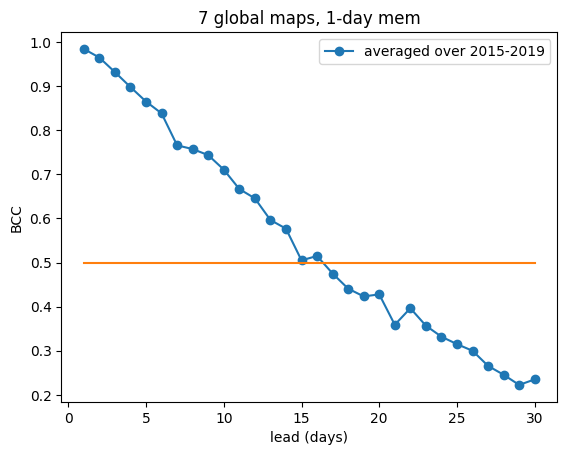

In [45]:
iniRMM = xr.open_dataset('/global/homes/l/linyaoly/ERA5/reanalysis/RMM_ERA5_daily.nc')
a = iniRMM.sel(time=slice('2015-01-01','2016-12-30'))
b = iniRMM.sel(time=slice('2017-01-01','2019-12-31'))

iniRMM = xr.concat((a,b), dim='time')
RMM1 = iniRMM['RMM'][:,0]
RMM2 = iniRMM['RMM'][:,1]
IniAmp = np.sqrt(RMM1 * RMM1 + RMM2 * RMM2)

dirn = '~/ERA5/script/Stability-Explanability/7maps_36yrtraining_RMMERA5_filtered/output/'

BCC = np.zeros(30)

for lead in np.arange(1,31):
    dsp0 = []
    dst0 = []
    for yn in np.arange(2015,2020):
        fnp = dirn + 'predicted_UNET_7maps_RMMERA5_36yr_lead' + str(lead) + '_dailyinput_mem1d' + str(yn) + '.csv'
        fnt = dirn + 'truth_UNET_7maps_RMMERA5_36yr_lead' + str(lead) + '_dailyinput_mem1d' + str(yn) + '.csv'

        dsp = pd.read_csv(fnp, header=None, names=['RMMp1','RMMp2'])
        dsp0.append(dsp)
        dst = pd.read_csv(fnt, header=None, names=['RMMt1','RMMt2'])
        dst0.append(dst)

    dsp = pd.concat(dsp0, axis=0, ignore_index=True)
    dst = pd.concat(dst0, axis=0, ignore_index=True)

    ds = pd.concat((dsp,dst), axis=1)
    ds['IniAmp'] = IniAmp.values 

    ds = ds.loc[ds['IniAmp']>=1]

    r1p = np.asarray(ds['RMMp1'])
    r2p = np.asarray(ds['RMMp2'])
    r1t = np.asarray(ds['RMMt1'])
    r2t = np.asarray(ds['RMMt2'])

    del ds 
    del dsp 
    del dst 

    A = np.sum(r1p * r1t + r2p * r2t)
    B = np.sqrt(np.sum(r1p * r1p + r2p * r2p))
    C = np.sqrt(np.sum(r1t * r1t + r2t * r2t))
    BCC[lead-1] = A / B / C 

plt.plot(np.arange(1,31), BCC, 'o-', label='averaged over 2015-2019')
plt.plot(np.arange(1,31), 0.5 * np.ones(30))
plt.legend()
plt.title('7 global maps, 1-day mem')
plt.xlabel('lead (days)')
plt.ylabel('BCC')


In [24]:
ds 

,RMM1,RMM2,RMM1,RMM2
0,0.981364,-0.535016,1.147635,-0.351055
1,1.243399,-0.296870,1.212031,0.053654
2,1.416136,0.115459,1.436842,0.302816
3,1.616447,0.385177,1.819747,0.564866
4,1.886212,0.576957,1.997545,0.550993
...,...,...,...,...
1820,-0.040157,0.793768,-0.132474,1.103801
1821,-0.439627,0.807106,-0.469978,1.089061
1822,-0.858364,0.590929,-0.564833,0.768421
1823,-0.738712,0.280681,-0.444110,0.396718


In [27]:
ds = ds.loc[ds['IniAmp']>=1]
ds 

,RMM1,RMM2,RMM1,RMM2,IniAmp
0,0.981364,-0.535016,1.147635,-0.351055,1.404658
1,1.243399,-0.296870,1.212031,0.053654,1.200127
2,1.416136,0.115459,1.436842,0.302816,1.213218
3,1.616447,0.385177,1.819747,0.564866,1.468404
4,1.886212,0.576957,1.997545,0.550993,1.905401
...,...,...,...,...,...
1818,0.661145,0.834693,0.647595,1.174329,1.230509
1819,0.424186,0.783205,0.336641,1.216464,1.341055
1820,-0.040157,0.793768,-0.132474,1.103801,1.262185
1821,-0.439627,0.807106,-0.469978,1.089061,1.111723


In [26]:
ds 

,RMM1,RMM2,RMM1,RMM2,IniAmp
0,0.981364,-0.535016,1.147635,-0.351055,1.404658
1,1.243399,-0.296870,1.212031,0.053654,1.200127
2,1.416136,0.115459,1.436842,0.302816,1.213218
3,1.616447,0.385177,1.819747,0.564866,1.468404
4,1.886212,0.576957,1.997545,0.550993,1.905401
...,...,...,...,...,...
1820,-0.040157,0.793768,-0.132474,1.103801,1.262185
1821,-0.439627,0.807106,-0.469978,1.089061,1.111723
1822,-0.858364,0.590929,-0.564833,0.768421,1.186142
1823,-0.738712,0.280681,-0.444110,0.396718,0.953681


Text(0, 0.5, 'BCC')

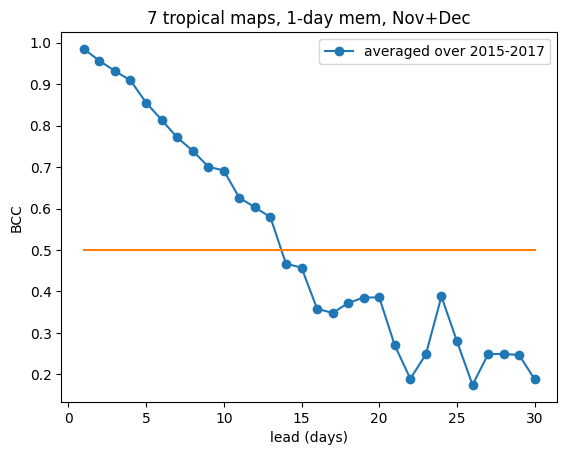

In [62]:
iniRMM = xr.open_dataset('/global/homes/l/linyaoly/ERA5/reanalysis/RMM_ERA5_daily.nc')
a = iniRMM.sel(time=slice('2015-01-01','2016-12-30'))
b = iniRMM.sel(time=slice('2017-01-01','2017-12-31'))

iniRMM = xr.concat((a,b), dim='time')
RMM1 = iniRMM['RMM'][:,0]
RMM2 = iniRMM['RMM'][:,1]
IniAmp = np.sqrt(RMM1 * RMM1 + RMM2 * RMM2)

dirn = '~/ERA5/script/Stability-Explanability/7maps_36yrtraining_RMMERA5_filtered_trop/output/'

BCC = np.zeros(30)

for lead in np.arange(1,31):
    dsp0 = []
    dst0 = []
    for yn in np.arange(2015,2018):
        fnp = dirn + 'predicted_UNET_7mapstrop_RMMERA5_36yr_lead' + str(lead) + '_dailyinput_mem1d' + str(yn) + '.csv'
        fnt = dirn + 'truth_UNET_7mapstrop_RMMERA5_36yr_lead' + str(lead) + '_dailyinput_mem1d' + str(yn) + '.csv'

        dsp = pd.read_csv(fnp, header=None, names=['RMMp1','RMMp2'])
        dsp0.append(dsp)
        dst = pd.read_csv(fnt, header=None, names=['RMMt1','RMMt2'])
        dst0.append(dst)

    dsp = pd.concat(dsp0, axis=0, ignore_index=True)
    dst = pd.concat(dst0, axis=0, ignore_index=True)

    ds = pd.concat((dsp,dst), axis=1)
    ds['IniAmp'] = IniAmp.values 
    ds = ds.iloc[304:,:]

    ds = ds.loc[ds['IniAmp']>=1]

    r1p = np.asarray(ds['RMMp1'])
    r2p = np.asarray(ds['RMMp2'])
    r1t = np.asarray(ds['RMMt1'])
    r2t = np.asarray(ds['RMMt2'])

    del ds 
    del dsp 
    del dst 

    A = np.sum(r1p * r1t + r2p * r2t)
    B = np.sqrt(np.sum(r1p * r1p + r2p * r2p))
    C = np.sqrt(np.sum(r1t * r1t + r2t * r2t))
    BCC[lead-1] = A / B / C 

plt.plot(np.arange(1,31), BCC, 'o-', label='averaged over 2015-2017')
plt.plot(np.arange(1,31), 0.5 * np.ones(30))
plt.legend()
plt.title('7 tropical maps, 1-day mem, Nov+Dec')
plt.xlabel('lead (days)')
plt.ylabel('BCC')

array([[1.14510333e-310, 1.14510333e-310, 2.21933340e-316,
        2.21933340e-316, 0.00000000e+000],
       [0.00000000e+000,             nan, 0.00000000e+000,
        4.94065646e-324, 0.00000000e+000],
       [4.44659081e-323, 1.14494372e-310, 9.76403161e-317,
                    nan, 0.00000000e+000],
       [            nan, 0.00000000e+000, 7.68638430e+275,
        3.55727265e-322, 5.43472210e-323],
       [1.14494372e-310, 9.76403952e-317, 1.48219694e-323,
        1.38338381e-322,             nan],
       [0.00000000e+000, 5.38284496e+228, 7.11454530e-322,
        5.43472210e-323, 1.14494372e-310],
       [9.76404347e-317, 0.00000000e+000, 1.38338381e-322,
                    nan, 4.94065646e-323],
       [1.14481673e-310, 1.06718180e-321, 3.95252517e-323,
        1.14494372e-310, 9.76565017e-317],
       [5.99998459e-317, 1.28457068e-322,             nan,
        0.00000000e+000, 1.14481673e-310],
       [1.42290906e-321, 5.43472210e-323, 1.14494372e-310,
        9.76298024e-317

In [ ]:
dirn = '~/ERA5/script/Stability-Explanability/7maps_36yrtraining_RMMERA5_filtered_trop/output/'
iniRMM = xr.open_dataset('/global/homes/l/linyaoly/ERA5/reanalysis/RMM_ERA5_daily.nc')
a = iniRMM.sel(time=slice('2015-01-01','2016-12-30'))
b = iniRMM.sel(time=slice('2017-01-01','2019-12-31'))

BCC = []
yn = 2015
iniRMM = xr.concat((a,b), dim='time')

del a 

for lead in np.arange(1,31):

    fnp = dirn + 'predicted_UNET_7mapstrop_RMMERA5_36yr_lead' + str(lead) + '_dailyinput_mem1d' + str(yn) + '.csv'
    fnt = dirn + 'truth_UNET_7mapstrop_RMMERA5_36yr_lead' + str(lead) + '_dailyinput_mem1d' + str(yn) + '.csv'

    dsp = pd.read_csv(fnp, header=None, names=['RMMp1','RMMp2'])
    dst = pd.read_csv(fnt, header=None, names=['RMMt1','RMMt2'])

    a = iniRMM.sel(time=slice(str(yn)+'-01-01',str(yn)+'-12-31'))
    RMM1 = a['RMM'][:,0]
    RMM2 = a['RMM'][:,1]
    IniAmp = np.sqrt(RMM1 * RMM1 + RMM2 * RMM2)

    ds = pd.concat((dsp,dst), axis=1)
    ds['IniAmp'] = IniAmp.values 

    ds = ds.loc[ds['IniAmp']>=1]

    pc1p = np.asarray(ds['RMMp1'])
    pc2p = np.asarray(ds['RMMp2'])
    pc1t = np.asarray(ds['RMMt1'])
    pc2t = np.asarray(ds['RMMt2'])

    d = (pc1t-pc1p)*(pc1t-pc1p)+(pc2t-pc2p)*(pc2t-pc2p)
    tmp = np.sqrt(d)
    # A = r1p * r1t + r2p * r2t
    # B = np.sqrt(r1p * r1p + r2p * r2p)
    # C = np.sqrt(r1t * r1t + r2t * r2t)
    # tmp = A / B / C 
    # BCC.append(tmp)

    plt.boxplot(d)
    # plt.scatter(lead*np.ones(tmp.shape), tmp)  # , label=['2015','2016','2017','2018','2019'])
    del tmp 
    # plt.plot(np.arange(1,31), 0.5 * np.ones(30))
    # plt.legend()
    # plt.title('7 tropical maps, 1-day mem')
    # plt.xlabel('lead (days)')
    # plt.ylabel('BCC')

In [35]:
import numpy as np 
import xarray as xr
import pandas as pd 
import os.path
import matplotlib.pyplot as plt 

dirn = '~/ERA5/script/Stability-Explanability/7maps_36yrtraining_RMMERA5_filtered_trop/output/'
iniRMM = xr.open_dataset('/global/homes/l/linyaoly/ERA5/reanalysis/RMM_ERA5_daily.nc')
a = iniRMM.sel(time=slice('2015-01-01','2016-12-30'))
b = iniRMM.sel(time=slice('2017-01-01','2019-12-31'))

BCC = []
RMSE = []

iniRMM = xr.concat((a,b), dim='time')

del a 

for yn in np.arange(2015,2016):

    for lead in np.arange(1,31):

        fnp = dirn + 'predicted_UNET_7mapstrop_RMMERA5_36yr_lead' + str(lead) + '_dailyinput_mem1d' + str(yn) + '.csv'
        fnt = dirn + 'truth_UNET_7mapstrop_RMMERA5_36yr_lead' + str(lead) + '_dailyinput_mem1d' + str(yn) + '.csv'

        dsp = pd.read_csv(fnp, header=None, names=['RMMp1','RMMp2'])
        dst = pd.read_csv(fnt, header=None, names=['RMMt1','RMMt2'])

        a = iniRMM.sel(time=slice(str(yn)+'-01-01',str(yn)+'-12-31'))
        RMM1 = a['RMM'][:,0]
        RMM2 = a['RMM'][:,1]
        IniAmp = np.sqrt(RMM1 * RMM1 + RMM2 * RMM2)

        ds = pd.concat((dsp,dst), axis=1)
        ds['IniAmp'] = IniAmp.values 
        ds['time'] = a['time']

        ds = ds.iloc[0:,:]

        ds = ds.loc[ds['IniAmp']>=1]

        pc1p = np.asarray(ds['RMMp1'])
        pc2p = np.asarray(ds['RMMp2'])
        pc1t = np.asarray(ds['RMMt1'])
        pc2t = np.asarray(ds['RMMt2'])

        d = (pc1t-pc1p)*(pc1t-pc1p)+(pc2t-pc2p)*(pc2t-pc2p)
        tmp = np.sqrt(d)
        RMSE.append(tmp)

        del tmp 
        
        r1p = np.asarray(ds['RMMp1'])
        r2p = np.asarray(ds['RMMp2'])
        r1t = np.asarray(ds['RMMt1'])
        r2t = np.asarray(ds['RMMt2'])

        A = r1p * r1t + r2p * r2t
        B = np.sqrt(r1p * r1p + r2p * r2p)
        C = np.sqrt(r1t * r1t + r2t * r2t)
        tmp = A / B / C 
        BCC.append(tmp)

        # plt.scatter(lead*np.ones(tmp.shape), tmp)  # , label=['2015','2016','2017','2018','2019'])
        del tmp 
        # plt.plot(np.arange(1,31), 0.5 * np.ones(30))
        # plt.legend()
        # plt.title('7 tropical maps, 1-day mem')
        # plt.xlabel('lead (days)')
        # plt.ylabel('BCC')



Text(0.5, 1.0, '2015')

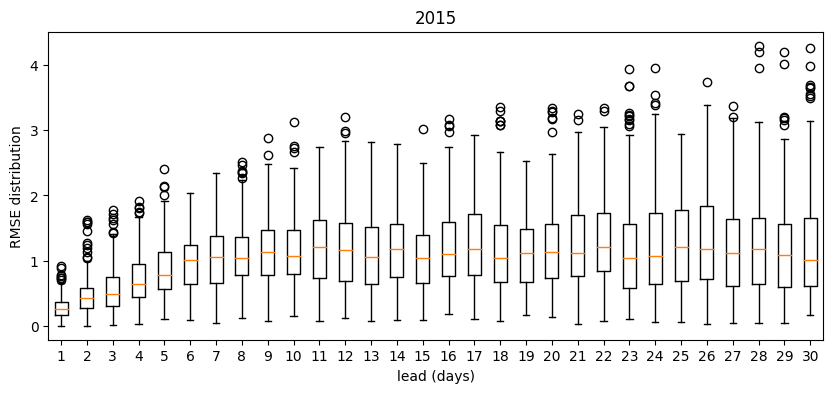

In [41]:
fig = plt.figure(figsize=(10,4))
plt.boxplot(RMSE)
plt.xlabel('lead (days)')
plt.ylabel('RMSE distribution')
plt.title(str(yn))


Text(0.5, 1.0, '2015')

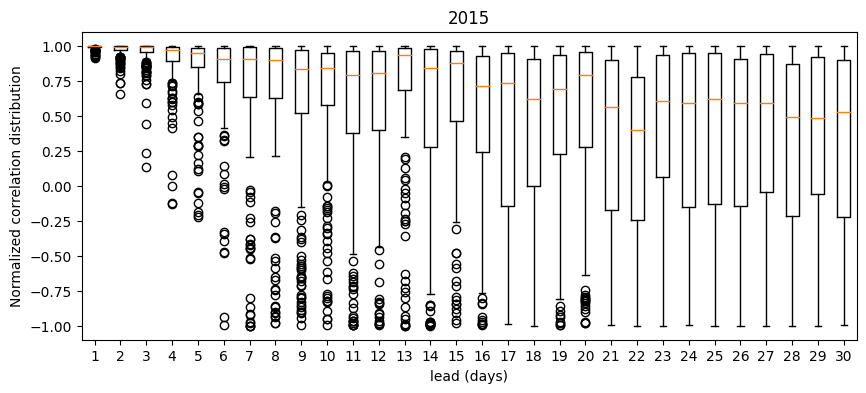

In [40]:
fig = plt.figure(figsize=(10,4))
plt.boxplot(BCC)
plt.xlabel('lead (days)')
plt.ylabel('Normalized correlation distribution')
plt.title(str(yn))

In [18]:
a = iniRMM.sel(time=slice(str(yn)+'-01-01',str(yn)+'-12-31'))
a['time']

<xarray.DataArray 'time' (time: 365)>
array(['2015-01-01T00:00:00.000000000', '2015-01-02T00:00:00.000000000',
       '2015-01-03T00:00:00.000000000', ..., '2015-12-29T00:00:00.000000000',
       '2015-12-30T00:00:00.000000000', '2015-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01 2015-01-02 ... 2015-12-31

In [19]:
ds 

,RMMp1,RMMp2,RMMt1,RMMt2,IniAmp,time
0,1.008925,-0.284374,1.147635,-0.351055,1.404658,2015-01-01
1,0.981014,-0.022622,1.212031,0.053654,1.200127,2015-01-02
2,1.149683,0.384596,1.436842,0.302816,1.213218,2015-01-03
3,1.498712,0.548154,1.819747,0.564866,1.468404,2015-01-04
4,1.741250,0.626155,1.997545,0.550993,1.905401,2015-01-05
...,...,...,...,...,...,...
360,1.058694,1.613903,1.064587,1.948920,2.040500,2015-12-27
361,0.783149,1.915899,0.816755,2.020008,2.220729,2015-12-28
362,0.486708,2.005704,0.544168,2.071584,2.178880,2015-12-29
363,0.191700,1.980605,0.327835,1.936739,2.141863,2015-12-30


In [24]:
ds['time'] > np.datetime64(str(yn)+'-11-31')

ValueError: Day out of range in datetime string "2015-11-31"

In [22]:
ds['time']

0     2015-01-01
1     2015-01-02
2     2015-01-03
3     2015-01-04
4     2015-01-05
         ...    
360   2015-12-27
361   2015-12-28
362   2015-12-29
363   2015-12-30
364   2015-12-31
Name: time, Length: 365, dtype: datetime64[ns]

In [23]:
yn 

2015

In [31]:
ds.iloc[304:,:]

,RMMp1,RMMp2,RMMt1,RMMt2,IniAmp,time
304,-1.062838,-2.011106,-1.098881,-2.035240,2.497833,2015-11-01
305,-0.822965,-2.003790,-0.852159,-2.056617,2.312951,2015-11-02
306,-0.692646,-1.972008,-0.719629,-2.113865,2.226173,2015-11-03
307,-0.581151,-1.866284,-0.390892,-2.037210,2.233000,2015-11-04
308,-0.176067,-1.823130,-0.140308,-2.106477,2.074372,2015-11-05
...,...,...,...,...,...,...
360,1.058694,1.613903,1.064587,1.948920,2.040500,2015-12-27
361,0.783149,1.915899,0.816755,2.020008,2.220729,2015-12-28
362,0.486708,2.005704,0.544168,2.071584,2.178880,2015-12-29
363,0.191700,1.980605,0.327835,1.936739,2.141863,2015-12-30


In [51]:
iniRMM = xr.open_dataset('/global/homes/l/linyaoly/ERA5/reanalysis/RMM_ERA5_daily.nc')
a = iniRMM.sel(time=slice('2016-02-20','2016-03-01'))

In [52]:
a

<xarray.Dataset>
Dimensions:  (time: 11, mode: 2)
Coordinates:
  * time     (time) datetime64[ns] 2016-02-20 2016-02-21 ... 2016-03-01
  * mode     (mode) int64 0 1
Data variables:
    RMM      (time, mode) float32 ...